In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
# 그래프 선 종류
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 확률의 성질 (0 이상의 실수, 합이 1) 만족하는지 체크
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob>=0), 'minus probability' # 조건을 만족하지 않으면 에러 발생
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {V(X):.4}')

# 확률함수, 기댓값 그리기
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label = 'mean', color='gray')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

# 1. 베르누이 분포

1이 나올 확률을 p, 0이 나올 확률을 1-p, 나머지는 0  
$f(x) = \begin{cases}p^x(1-p)^{(1-x)} & (x\in\{0,1\}) \\ 0 & (otherwise) \end{cases}$  
$X\sim Bern(p)$일 때 $E(X) =p, \ V(X)=p(1-p)$

## 정의에 따라

expected value 0.3
variance 0.21


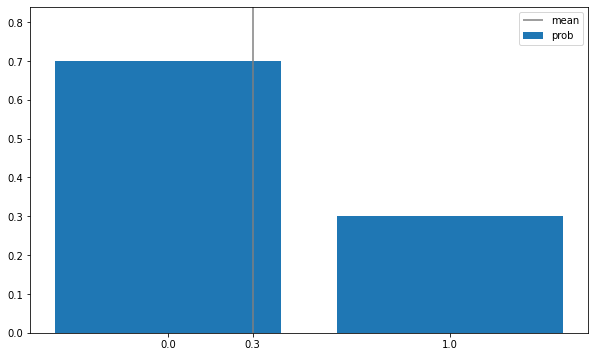

(None, None)

In [3]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

p = 0.3
X = Bern(p)

check_prob(X), plot_prob(X)

## scipy 이용  
`scipy.stats.bernoulli(p)`

In [4]:
rv = stats.bernoulli(p)
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [5]:
rv.pmf([0, 1]) # 확률함수

array([0.7, 0.3])

In [6]:
rv.cdf([0, 1]) # 누적밀도함수

array([0.7, 1. ])

In [7]:
rv.mean(), rv.var() # 평균, 분산

(0.3, 0.21)

# 2. 이항분포

확률이 p일 때 n번 반복할 때 사건이 x번 발생할 확률  
$f(x) = \begin{cases}_nC_xp^x(1-p)^{(n-x)} & (x\in\{0,1,...,n\}) \\ 0 & (otherwise) \end{cases}$  
$X\sim Bin(n,p)$일 때 $E(X)=np, \ V(X) = np(1-p)$

## 정의에 따라

expected value 3.0
variance 2.1


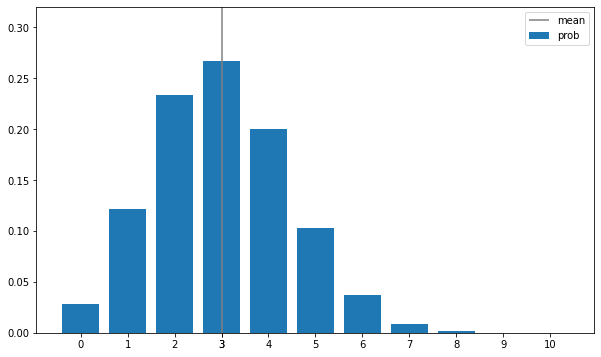

(None, None)

In [8]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

n, p = 10, 0.3
X = Bin(n, p)

check_prob(X), plot_prob(X)

## scipy 이용  
`scipy.stats.binom(n,p)`

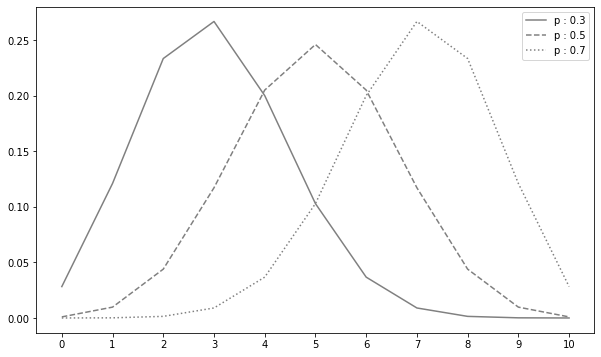

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p : {p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

# 3. 기하분포

사건이 반복된지 x번 만에 발생할 확률  
$f(x) = \begin{cases} (1-p)^{(x-1)}p & (x\in \{1,2,3,...\}) \\ 0 & (otherwise) \end{cases}$  
$X\sim Ge(p)$일 때 $E(X) = {{1} \over {p}}, V(X) = {{(1-p)} \over {p^2}}$

## 정의에 따라

expected value 2.0
variance 2.0


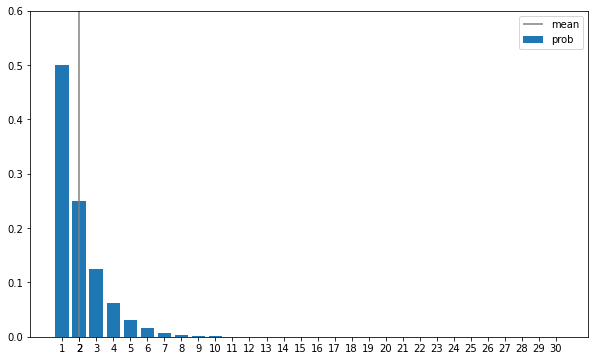

(None, None)

In [10]:
# 편의상 최대 30번만 반복
def Ge(p):
    x_set = np.arange(1, 31)
    def f(x):
        if x in x_set :
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

p = 0.5
X = Ge(p)
check_prob(X), plot_prob(X)

## scipy 이용  
`scipy.stats.geom(p)`

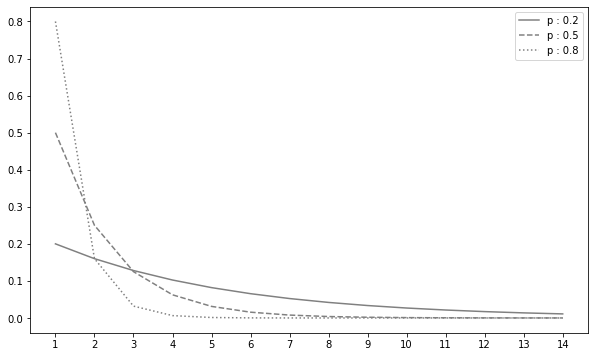

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p : {p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

# 4. 포아송 분포

단위 시간당 발생하는 건수가 $\lambda$일 때 사건이 단위 시간 내에 x번 발생할 확률  
$ f(x) = \begin{cases}{ {\lambda ^x} \over {x!} } e^{-\lambda } & (x\in \{0, 1, 2, ...\}) \\ 0 & (otherwise) \end{cases}$  
$ X \sim Poi(\lambda)$ 일 때 $ E(X)=\lambda, \ V(X) = \lambda $

## 정의에 따라

expected value 3.0
variance 3.0


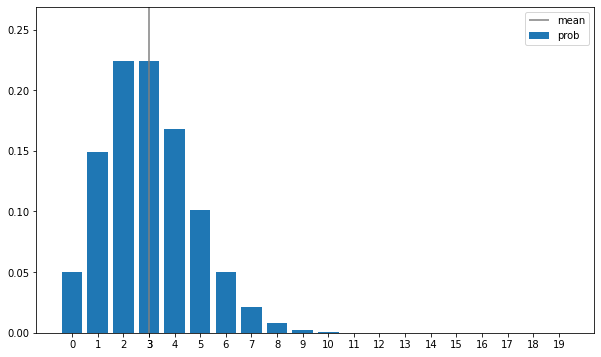

(None, None)

In [13]:
from scipy.special import factorial

# 편의상 0~19까지
def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

lam = 3
X = Poi(lam)

check_prob(X), plot_prob(X)

## scipy 이용  
`scipy.stats.poisson(lam)`

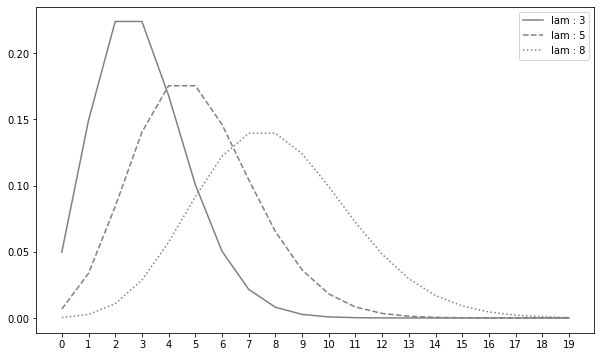

In [15]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), label=f'lam : {lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()